# <center> Sequential MUD estimation for ODE Systems </center>

___
<font color='blue'><center>**Carlos del-Castillo-Negrete, Rylan Spence**</center></font>
    <br>
    <center>University of Texas at Austin
    <br>
    carlos.delcastillo@utexas.edu, rylan.spence@utexas.edu</center>
___

- [***Parameter Estimation with Maximal Updated Densities***](https://arxiv.org/pdf/2212.04587.pdf) Pilosov, M., del-Castillo-Negrete, C., Yen, T. Y., Butler, T., & Dawson, C. (2022). Parameter Estimation with Maximal Updated Densities. arXiv preprint arXiv:2212.04587.
___


<cite id="e9b62"><a href="#zotero%7C11450669%2F7F6J6S7U">(Wicks &#38; Atkinson, 2017)</a></cite>


____

# Lotka-Volterra

## Mud Estimation example for Predator Prey model

- Model: 
$$
\begin{aligned}
& \frac{d x}{d t}=\alpha x-\beta x y \\
& \frac{d y}{d t}=\delta x y-\gamma y
\end{aligned}
$$
where
- $x$ is the number of prey (for example, rabbits);
- $y$ is the number of some predator (for example, foxes);
- $\frac{d y}{d t}$ and $\frac{d x}{d t}$ represent the instantaneous growth rates of the two populations;
- $t$ represents time;
- $\alpha, \beta, \gamma, \delta$ are positive real parameters describing the interaction of the two species:

    - $\alpha=$ growth rate of prey
    - $\beta$ = death rate of rabbits due to predatation from predators
    - $\gamma=$ natural death rate of predators
    - $\delta=$ factor describing how many consumed prey create a new predator

Solving model sample set: |████████████████████| 1000/1000 [100%] in 1.1s (774.8


<Axes: title={'center': 'State 0 Temporal Evolution'}, xlabel='Time Step', ylabel='State 0'>

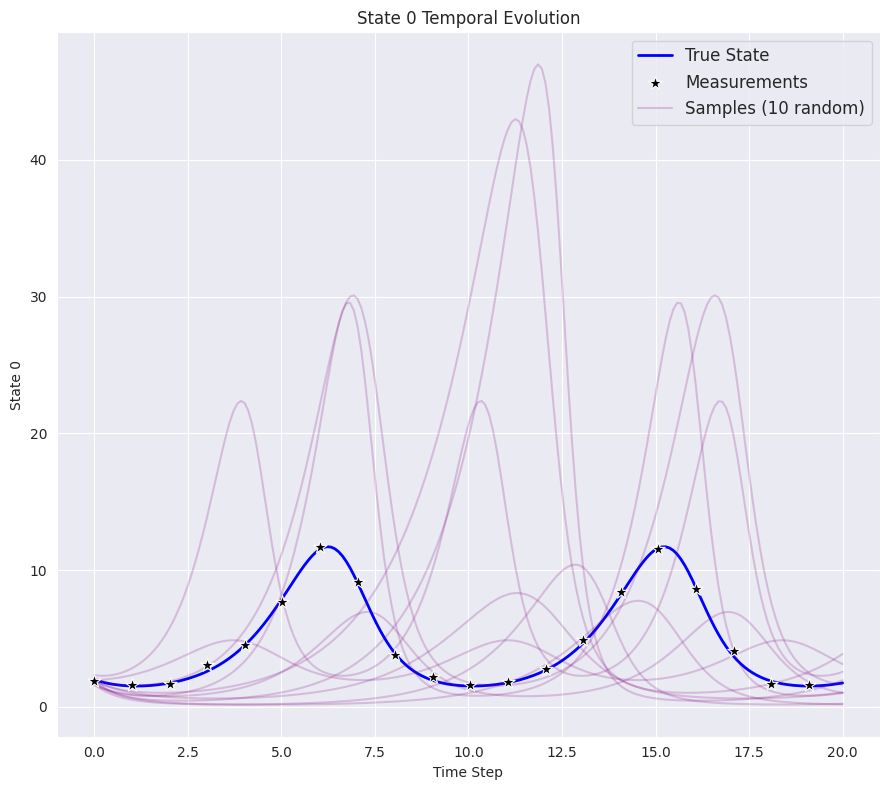

In [132]:
import numpy as np
from pydci.examples import lotka_volterra
import importlib
importlib.reload(lotka_volterra)

lvm = lotka_volterra.LotkaVolteraModel()
samples = lvm.get_uniform_initial_samples(num_samples=1000, scale=0.5)
res = lvm.forward_solve(20, samples=samples)
lvm.plot_state()

## Using $Q_{PCA}$ Map

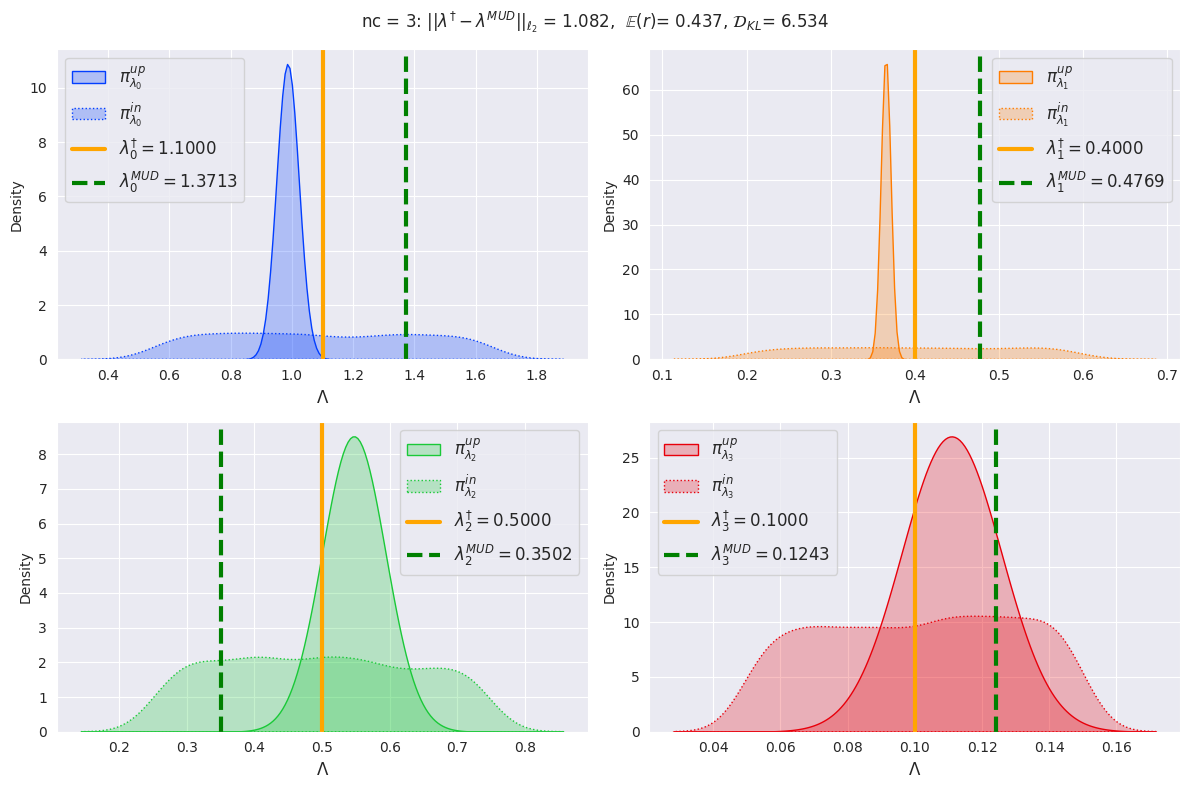

In [222]:
import matplotlib.pyplot as plt
import pydci.ConsistentBayes as CB
importlib.reload(CB)

pca_prob = CB.PCAMUDProblem(res['samples'], res['data'], res['std_dev'])
pca_prob.solve(best_method='max_kl')
pca_prob.param_density_plots(nc=3, lam_true=lvm.lam_true)

In [223]:
pca_prob.pca_result

,e_r,kl,lam_MUD_0,lam_MUD_1,lam_MUD_2,lam_MUD_3,predict_delta,within_thresh,closest,max_kl,min_kl
nc,,,,,,,,,,,
1,0.871836,3.047117,1.371254,0.476937,0.350175,0.124257,0.128164,True,True,True,True
2,0.016660,6.161351,1.132030,0.516982,0.648175,0.109223,0.983340,False,False,False,False
3,0.023462,6.956141,0.985873,0.365181,0.546910,0.110931,0.976538,False,False,False,False
4,0.436833,6.534097,0.985873,0.365181,0.546910,0.110931,0.563167,False,False,False,False


In [233]:
penguins = sns.load_dataset("penguins")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<Axes: xlabel='q_pca_0', ylabel='q_pca_3'>

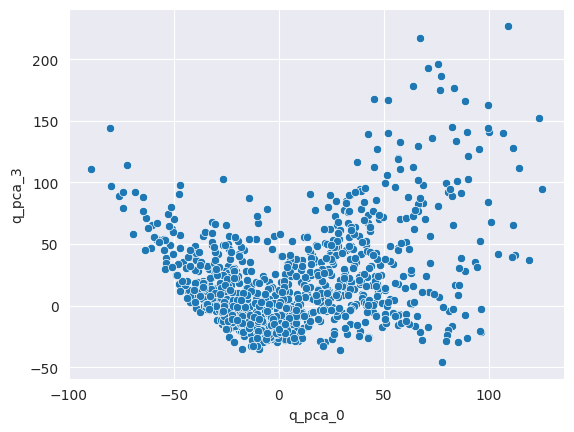

In [232]:
import seaborn as sns
sns.scatterplot(data=pca_prob.state, x='q_pca_0', y='q_pca_3')

array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\mathcal{D}$', ylabel='Density'>], dtype=object)

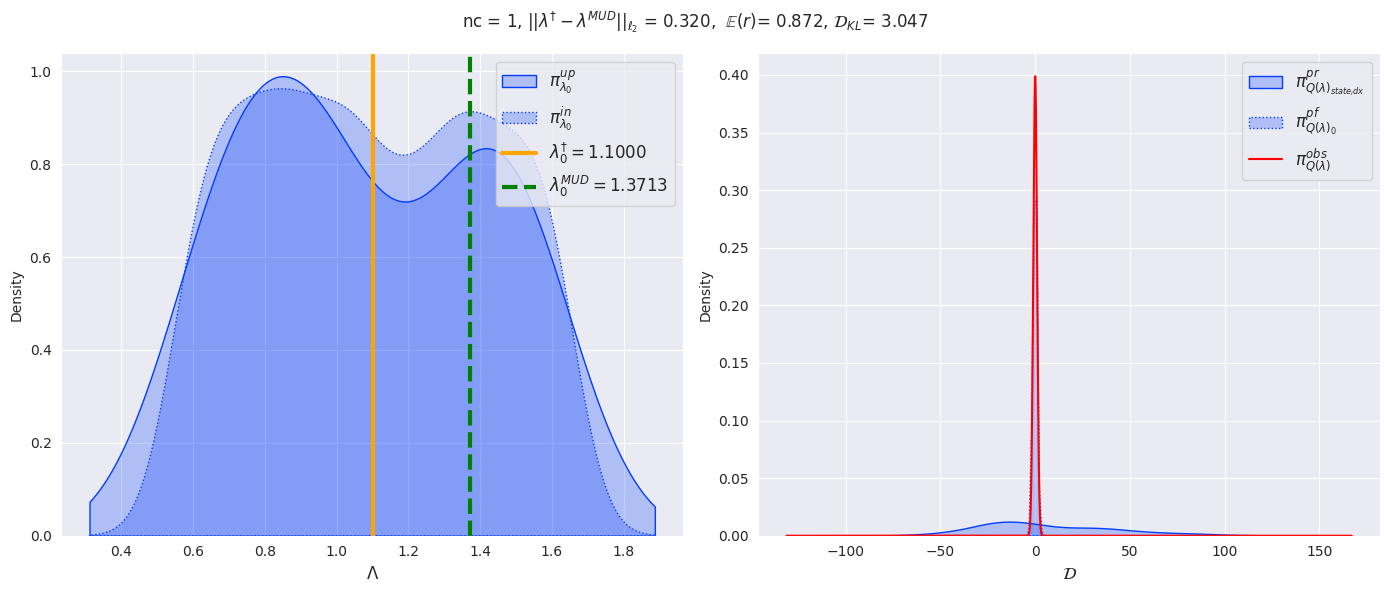

In [159]:
pca_prob.density_plots(lam_kwargs={'lam_true': [lvm.lam_true]})

In [152]:
bf = np.empty((len(lvm.samples[0]), 1), dtype=bool)
bf[:] = False
bf[pca_prob.mud_arg] = True
lvm.samples[0]['best_flag'] = bf

<Axes: title={'center': 'State 0 Temporal Evolution'}, xlabel='Time Step', ylabel='State 0'>

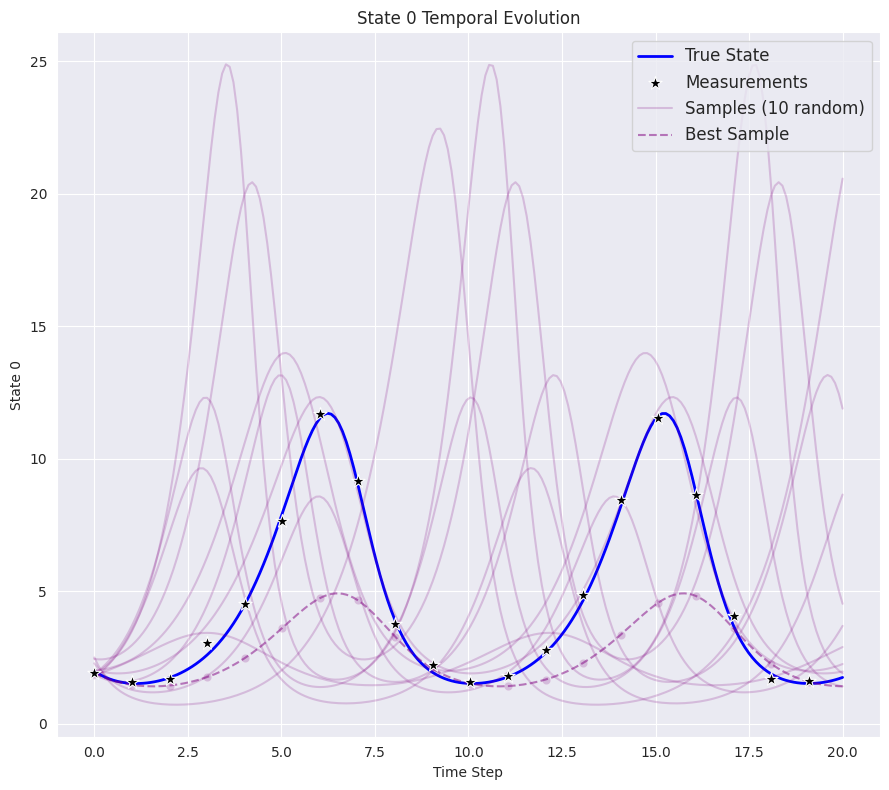

In [153]:
lvm.plot_state()

In [168]:
pca_prob.pca_states

[       pi_obs_nc=1  pi_pr_nc=1     ratio_nc=1     pi_up_nc=1
 0     0.000000e+00    0.003082   0.000000e+00   0.000000e+00
 1    3.120454e-179    0.006984  4.467991e-177  1.479752e-175
 2     1.420916e-77    0.007257   1.958059e-75   7.833996e-74
 3     2.309115e-02    0.010917   2.115083e+00   8.361790e+01
 4     0.000000e+00    0.006295   0.000000e+00   0.000000e+00
 ..             ...         ...            ...            ...
 995  8.136720e-172    0.007002  1.162010e-169  5.305876e-168
 996   3.981924e-01    0.010411   3.824886e+01   1.724063e+03
 997   0.000000e+00    0.002836   0.000000e+00   0.000000e+00
 998   3.367633e-03    0.009681   3.478503e-01   1.729534e+01
 999   0.000000e+00    0.003244   0.000000e+00   0.000000e+00
 
 [1000 rows x 4 columns],
        pi_obs_nc=2  pi_pr_nc=2     ratio_nc=2     pi_up_nc=2
 0     0.000000e+00    0.000001   0.000000e+00   0.000000e+00
 1     0.000000e+00    0.000062   0.000000e+00   0.000000e+00
 2     0.000000e+00    0.000086   0.000000

In [137]:
pca_prob.result

,e_r,kl,lam_MUD_0,lam_MUD_1,lam_MUD_2,lam_MUD_3,predict_delta,within_thresh,closest,max_kl,min_kl
nc,,,,,,,,,,,
1,0.871836,3.047117,1.371254,0.476937,0.350175,0.124257,0.128164,True,True,True,True


### PCA Solve Options - Masking Data

We can control the amount of data we use with the mask option

In [138]:
mask = np.arange(0, 10, 1)
mask

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

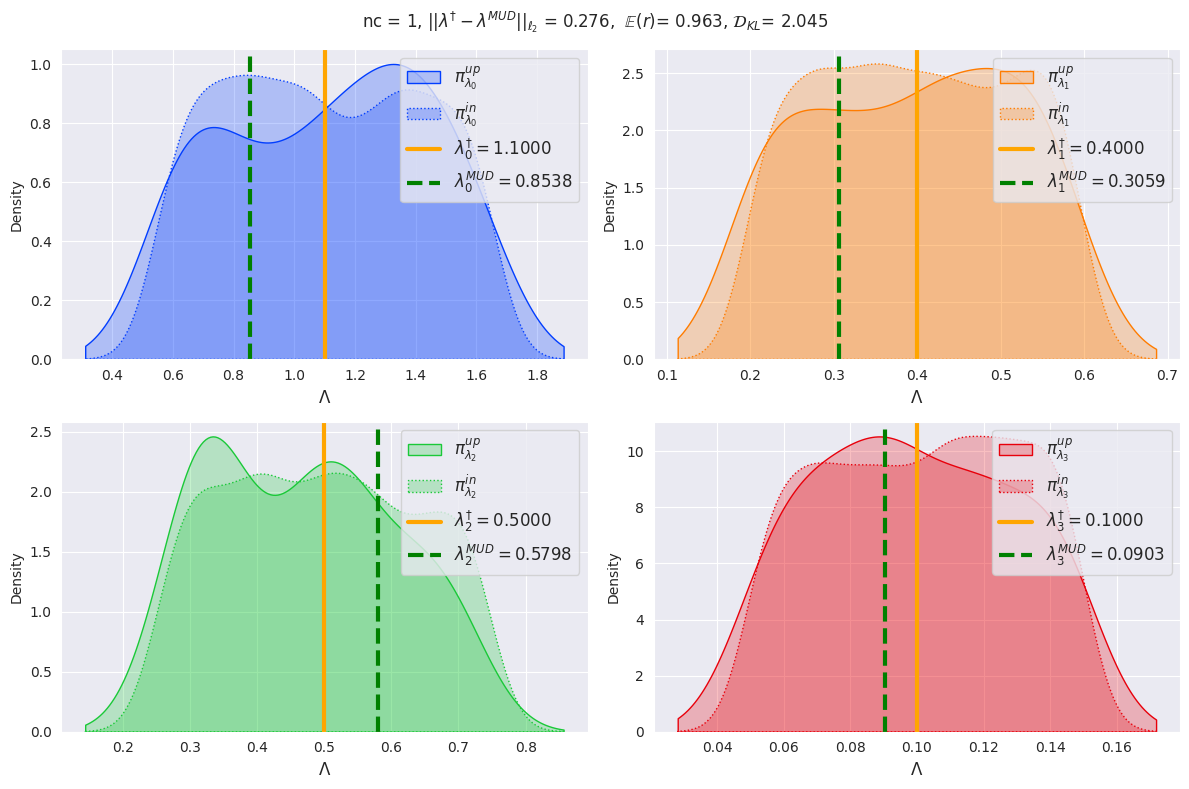

In [139]:
pca_prob.solve(pca_mask=mask)
pca_prob.param_density_plots(lam_true=lvm.lam_true)

## Sequential Estimation

Break up into intervals and solve

/opt/conda/envs/pyDCI/lib/python3.11/site-packages/numpy/lib/function_base.py:551: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,
/opt/conda/envs/pyDCI/lib/python3.11/site-packages/numpy/lib/function_base.py:551: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,
/opt/conda/envs/pyDCI/lib/python3.11/site-packages/numpy/lib/function_base.py:551: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,
/opt/conda/envs/pyDCI/lib/python3.11/site-packages/numpy/lib/function_base.py:551: RuntimeWarning: invalid value encountered in multiply
  avg = avg_as_array = np.multiply(a, wgt,


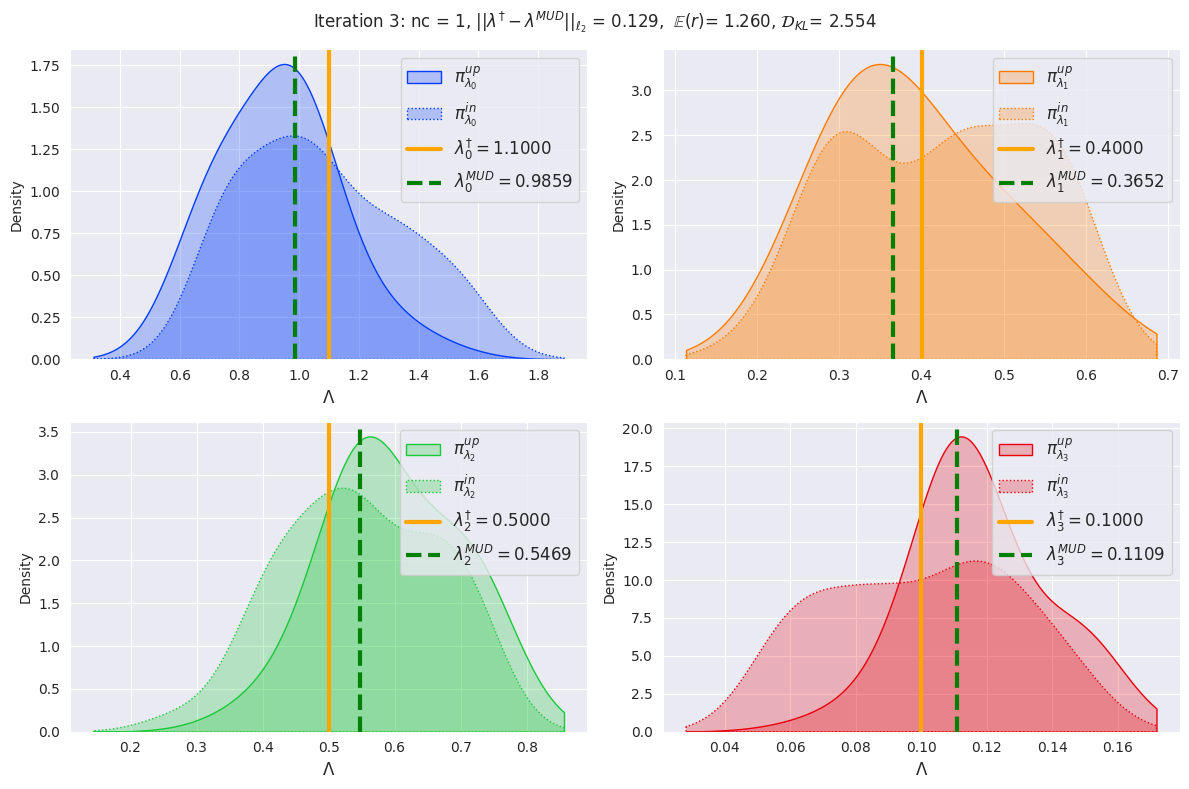

In [192]:
import matplotlib.pyplot as plt
import pydci.ConsistentBayes as CB
importlib.reload(CB)

seq_prob = CB.SequentialProblem(res['samples'], res['data'], res['std_dev'])
seq_prob.solve(num_splits=4, qoi_method='all', best_method='max_kl')
seq_prob.param_density_plots(lam_true=lvm.lam_true)

array([<Axes: xlabel='$\\Lambda$', ylabel='Density'>,
       <Axes: xlabel='$\\mathcal{D}$', ylabel='Density'>], dtype=object)

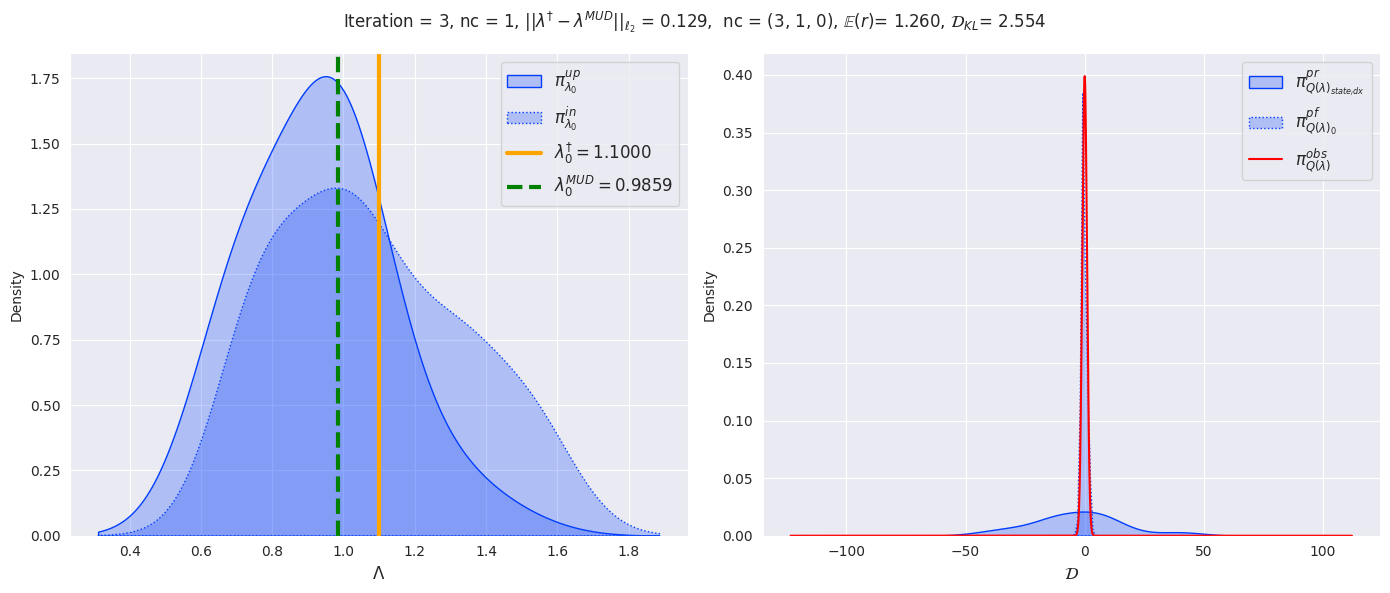

In [160]:
seq_prob.density_plots(lam_kwargs={'lam_true': [lvm.lam_true]})

In [193]:
seq_prob.result

,,,e_r,kl,lam_MUD_0,lam_MUD_1,lam_MUD_2,lam_MUD_3,predict_delta,within_thresh,closest,max_kl,min_kl
split,nc,qoi_comb,,,,,,,,,,,
3,1,0,1.259602,2.553501,0.985873,0.365181,0.54691,0.110931,0.259602,True,True,True,True


In [194]:
seq_prob.split_results

e_r        kl  lam_MUD_0  lam_MUD_1  lam_MUD_2  \
split nc qoi_comb                                                        
0     1  0         0.963130  2.044906   0.853752   0.305926   0.579848   
      2  0         1.111728  3.844720   0.763867   0.269555   0.593512   
      3  0         1.158137  3.910305   0.763867   0.269555   0.593512   
      4  0         1.057947  3.979462   1.332168   0.479439   0.416690   
1     1  0         1.797614  2.171496   0.985873   0.365181   0.546910   
      2  0         0.752445  3.895602   0.985873   0.365181   0.546910   
      3  0         0.364793  2.962074   0.985873   0.365181   0.546910   
      4  0         3.780484  2.862205   0.985873   0.365181   0.546910   
2     1  0         4.367034  1.083191   0.985873   0.365181   0.546910   
      2  0              NaN  1.415896   0.985873   0.365181   0.546910   
      3  0              NaN       inf   0.985873   0.365181   0.546910   
      4  0              NaN       inf   1.037692   0.356834   0.480686   
3     1  0         1.259602  2.553501   0.985873   0.365181   0.546910   
      2  0         0.220513  5.115428   0.985873   0.365181   0.546910   
      3  0         1.861729  5.264801   0.985873   0.365181   0.546910   
      4  0         3.955115  4.694929   0.985873   0.365181   0.546910   

                   lam_MUD_3  predict_delta  within_thresh  closest  max_kl  \
split nc qoi_comb                                                             
0     1  0          0.090298       0.036870           True     True   False   
      2  0          0.091082       0.111728           True    False   False   
      3  0          0.091082       0.158137           True    False   False   
      4  0          0.084554       0.057947           True    False    True   
1     1  0          0.110931       0.797614          False    False   False   
      2  0          0.110931       0.247555           True     True    True   
      3  0          0.110931       0.635207          False    False   False   
      4  0          0.110931       2.780484          False    False   False   
2     1  0          0.110931       3.367034          False    False   False   
      2  0          0.110931            NaN          False    False   False   
      3  0          0.110931            NaN          False    False   False   
      4  0          0.089990            NaN          False    False   False   
3     1  0          0.110931       0.259602           True     True    True   
      2  0          0.110931       0.779487          False    False   False   
      3  0          0.110931       0.861729          False    False   False   
      4  0          0.110931       2.955115          False    False   False   

                   min_kl  
split nc qoi_comb          
0     1  0           True  
      2  0          False  
      3  0          False  
      4  0          False  
1     1  0          False  
      2  0           True  
      3  0          False  
      4  0          False  
2     1  0          False  
      2  0          False  
      3  0          False  
      4  0          False  
3     1  0           True  
      2  0          False  
      3  0          False  
      4  0          False

In [195]:
seq_prob.state

,weight,pi_in,pi_pr,pi_obs,ratio,pi_up,q_lam_0,q_lam_1,q_lam_2,q_lam_3,...,q_lam_8,q_lam_9,lam_0,lam_1,lam_2,lam_3,q_pca_0,q_pca_1,q_pca_2,q_pca_3
0,1.040087e-13,16.880357,0.000093,0.000000e+00,0.000000e+00,0.000000e+00,20.510471,0.283376,40.334170,0.748382,...,1.746509,2.934537,0.889557,0.497476,0.745509,0.057341,66.601476,118.059735,58.070744,26.169889
1,0.000000e+00,0.824245,0.005902,1.200183e-279,2.033636e-277,0.000000e+00,2.013037,1.981626,3.812483,1.380462,...,6.593159,6.180875,1.313080,0.415619,0.730161,0.134199,-35.813959,36.236058,-45.668174,-9.797473
2,5.203746e-107,18.129003,0.005770,1.929732e-286,3.344611e-284,0.000000e+00,2.494576,4.096999,1.996134,3.298584,...,5.511623,2.353821,1.569696,0.484142,0.456829,0.111415,-36.248118,-7.792346,-31.349620,-10.085052
3,8.983998e-105,0.617082,0.006524,6.882607e-249,1.054948e-246,0.000000e+00,3.550546,2.318977,4.947789,2.218603,...,8.850917,3.667110,1.038450,0.314534,0.308083,0.062878,-33.778566,24.285468,-35.574258,0.551678
4,2.991726e-153,0.004072,0.012468,5.585541e-93,4.480074e-91,5.457566e-246,2.303304,5.512159,1.693342,5.180962,...,1.869252,3.799305,1.634340,0.361130,0.265342,0.103773,-20.567027,-20.204898,-33.042852,-20.913403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,9.217853e-87,8.230683,0.001991,0.000000e+00,0.000000e+00,0.000000e+00,1.833568,4.415564,1.303841,2.710052,...,10.076630,1.027938,1.452983,0.511324,0.596187,0.076453,-49.286606,-5.336710,-37.070720,1.810423
996,6.159980e-18,14.086856,0.013201,3.889756e-83,2.946497e-81,2.556816e-97,4.573402,2.435932,4.827282,3.133166,...,1.594794,3.381221,1.371254,0.476937,0.350175,0.124257,-19.433851,-3.223818,-16.953943,-18.783928
997,0.000000e+00,0.000013,0.016012,1.253468e-50,7.828224e-49,0.000000e+00,1.408111,8.309456,0.991645,7.002507,...,1.640812,4.092352,1.324589,0.218087,0.328734,0.136651,-15.098636,-29.924129,-42.609431,-20.483625
998,2.564927e-64,0.074748,0.007811,8.069467e-195,1.033031e-192,1.980569e-257,2.708260,2.489058,3.228405,2.556982,...,3.413954,3.637343,0.906378,0.291743,0.384226,0.138592,-29.866271,0.320837,-26.149563,-18.538650


In [197]:
seq_prob.split_states

,pi_obs_nc=1_qoi=0_split=0,pi_pr_nc=1_qoi=0_split=0,ratio_nc=1_qoi=0_split=0,pi_up_nc=1_qoi=0_split=0,pi_obs_nc=2_qoi=0_split=0,pi_pr_nc=2_qoi=0_split=0,ratio_nc=2_qoi=0_split=0,pi_up_nc=2_qoi=0_split=0,pi_obs_nc=3_qoi=0_split=0,pi_pr_nc=3_qoi=0_split=0,...,ratio_nc=2_qoi=0_split=3,pi_up_nc=2_qoi=0_split=3,pi_obs_nc=3_qoi=0_split=3,pi_pr_nc=3_qoi=0_split=3,ratio_nc=3_qoi=0_split=3,pi_up_nc=3_qoi=0_split=3,pi_obs_nc=4_qoi=0_split=3,pi_pr_nc=4_qoi=0_split=3,ratio_nc=4_qoi=0_split=3,pi_up_nc=4_qoi=0_split=3
0,2.022642e-04,0.030633,6.602746e-03,1.299094e-01,1.934822e-14,0.000449,4.308918e-11,8.477824e-10,5.522433e-15,0.000030,...,0.000000e+00,0.000000e+00,0.000000e+00,2.931823e-11,0.000000e+00,0.000000e+00,0.000000e+00,1.124981e-14,0.000000e+00,0.000000e+00
1,3.376146e-52,0.010635,3.174549e-50,1.051378e-48,1.622523e-141,0.000290,5.592494e-138,1.852176e-136,3.461129e-157,0.000067,...,0.000000e+00,0.000000e+00,0.000000e+00,1.212483e-08,0.000000e+00,0.000000e+00,0.000000e+00,6.489671e-10,0.000000e+00,0.000000e+00
2,1.184825e-14,0.015328,7.729932e-13,3.092667e-11,4.724824e-15,0.000601,7.855151e-12,3.142766e-10,1.827853e-15,0.000160,...,7.396814e-296,0.000000e+00,0.000000e+00,3.267649e-06,0.000000e+00,0.000000e+00,0.000000e+00,2.320171e-07,0.000000e+00,0.000000e+00
3,1.435334e-09,0.017093,8.397408e-08,3.319840e-06,3.105758e-15,0.000615,5.048865e-12,1.996023e-10,1.099586e-16,0.000088,...,0.000000e+00,0.000000e+00,0.000000e+00,4.150034e-07,0.000000e+00,0.000000e+00,0.000000e+00,9.088651e-09,0.000000e+00,0.000000e+00
4,3.311993e-86,0.009157,3.616735e-84,7.520481e-83,2.397618e-102,0.000097,2.470458e-98,5.136963e-97,4.395253e-103,0.000026,...,2.321014e-178,0.000000e+00,0.000000e+00,1.350946e-06,0.000000e+00,0.000000e+00,0.000000e+00,1.137778e-11,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2.432532e-06,0.018701,1.300735e-04,5.939311e-03,9.388158e-35,0.000496,1.892197e-31,8.639998e-30,7.384114e-45,0.000027,...,0.000000e+00,0.000000e+00,0.000000e+00,1.193264e-06,0.000000e+00,0.000000e+00,0.000000e+00,4.571473e-08,0.000000e+00,0.000000e+00
996,2.270757e-01,0.027117,8.373985e+00,3.774564e+02,4.803797e-17,0.001142,4.207152e-14,1.896369e-12,2.956089e-19,0.000240,...,4.587461e-82,3.980758e-98,1.315099e-148,9.252266e-06,1.421380e-143,1.233399e-159,1.266233e-225,1.252675e-07,1.010823e-218,8.771396e-235
997,1.124917e-275,0.004764,2.361175e-273,4.365205e-272,0.000000e+00,0.000027,0.000000e+00,0.000000e+00,0.000000e+00,0.000010,...,1.040498e-241,0.000000e+00,0.000000e+00,1.414569e-08,0.000000e+00,0.000000e+00,0.000000e+00,5.049894e-21,0.000000e+00,0.000000e+00
998,2.951092e-03,0.021050,1.401948e-01,6.970573e+00,1.655047e-19,0.000700,2.365261e-16,1.176023e-14,7.521188e-23,0.000067,...,4.139519e-191,7.936453e-256,0.000000e+00,4.380028e-06,0.000000e+00,0.000000e+00,0.000000e+00,7.234998e-08,0.000000e+00,0.000000e+00


# Results

In [69]:
lvm.get_full_df('state')

,ts,iteration,shift_idx,sample_flag,true_param_0,true_param_1,true_param_2,true_param_3,true_vals_0,true_vals_1,...,random_408_0,random_408_1,random_172_0,random_172_1,random_380_0,random_380_1,random_798_0,random_798_1,random_976_0,random_976_1
0,0.000000,0,0,True,1.1,0.4,0.5,0.1,2.000000,4.000000,...,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000,2.000000,4.000000
1,0.102041,0,0,False,1.1,0.4,0.5,0.1,1.905276,3.877485,...,1.793152,3.805148,1.890969,3.954305,1.896838,3.988298,2.042169,3.829794,1.735840,3.773733
2,0.204082,0,0,False,1.1,0.4,0.5,0.1,1.824128,3.755355,...,1.625088,3.612626,1.790945,3.903789,1.800426,3.970828,2.094469,3.668773,1.527070,3.553210
3,0.306122,0,0,False,1.1,0.4,0.5,0.1,1.755130,3.634292,...,1.488432,3.424328,1.699389,3.849089,1.710786,3.948059,2.157102,3.516786,1.361131,3.340319
4,0.408163,0,0,False,1.1,0.4,0.5,0.1,1.697053,3.514855,...,1.377383,3.241598,1.615757,3.790808,1.627837,3.920468,2.230378,3.373663,1.228615,3.136253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,24.591837,4,0,False,1.1,0.4,0.5,0.1,11.071261,3.518400,...,11.619041,2.726896,10.201254,2.588388,11.500240,2.880131,11.509270,2.868538,11.458861,3.592145
46,24.693878,4,0,False,1.1,0.4,0.5,0.1,10.681807,3.736096,...,11.587708,2.899179,10.271456,2.748455,11.371797,3.073735,11.468441,3.082433,11.031751,3.832276
47,24.795918,4,0,False,1.1,0.4,0.5,0.1,10.215512,3.949937,...,11.479346,3.080367,10.289616,2.919793,11.158769,3.274706,11.346318,3.309325,10.520320,4.068135
48,24.897959,4,0,False,1.1,0.4,0.5,0.1,9.686276,4.154807,...,11.292721,3.268427,10.252038,3.101502,10.863504,3.479871,11.141256,3.546545,9.940807,4.293563


In [70]:
lvm.get_full_df('results')

,iteration,lam_MUD_0,lam_MUD_1,lam_MUD_2,lam_MUD_3,l2_err,e_r,kl,mean_e_r,e_r_std,min_e_r,max_e_r,predict_delta,within_thresh,closest,max_kl,min_kl,action
0,0.0,1.309198,0.513625,0.480100,0.087085,0.239244,2.592165,3.168175,2.592165,NaN,2.592165,2.592165,1.592165,True,True,True,True,UPDATE
0,1.0,0.994708,0.359768,0.527251,0.105570,0.116097,1.339634,4.649279,1.339634,NaN,1.339634,1.339634,0.339634,True,True,True,True,UPDATE
0,2.0,1.041748,0.365001,0.493057,0.097794,0.068347,0.141104,1.533265,0.141104,NaN,0.141104,0.141104,0.858896,True,True,True,True,RE-WEIGHT
0,3.0,0.986603,0.356108,0.589472,0.112386,0.151473,0.552086,0.382706,0.552086,NaN,0.552086,0.552086,0.447914,True,True,True,True,RE-WEIGHT
0,4.0,1.087136,0.409810,0.569814,0.110364,0.072410,0.079377,8.529699,0.079377,NaN,0.079377,0.079377,0.920623,True,True,True,True,UPDATE


(-1.0, 10.0)

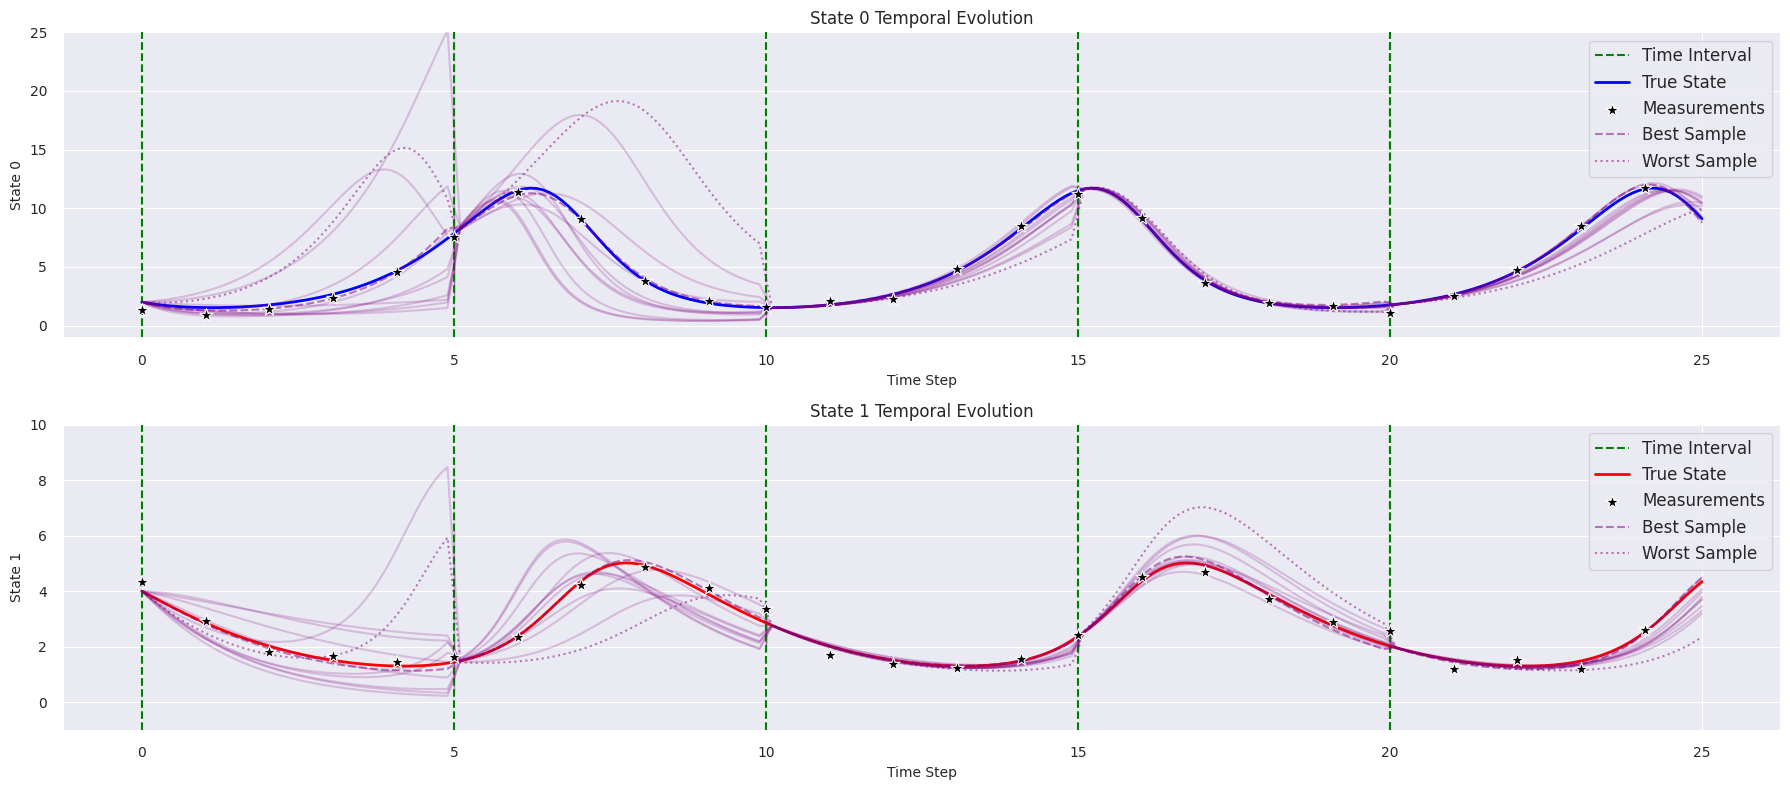

In [71]:
importlib.reload(plt)
plotter = plt.Plotter()

axs = plotter.plot_state_data(lvm, window_type='line')
axs[0].set_ylim([-1, 25])
axs[1].set_ylim([-1, 10])

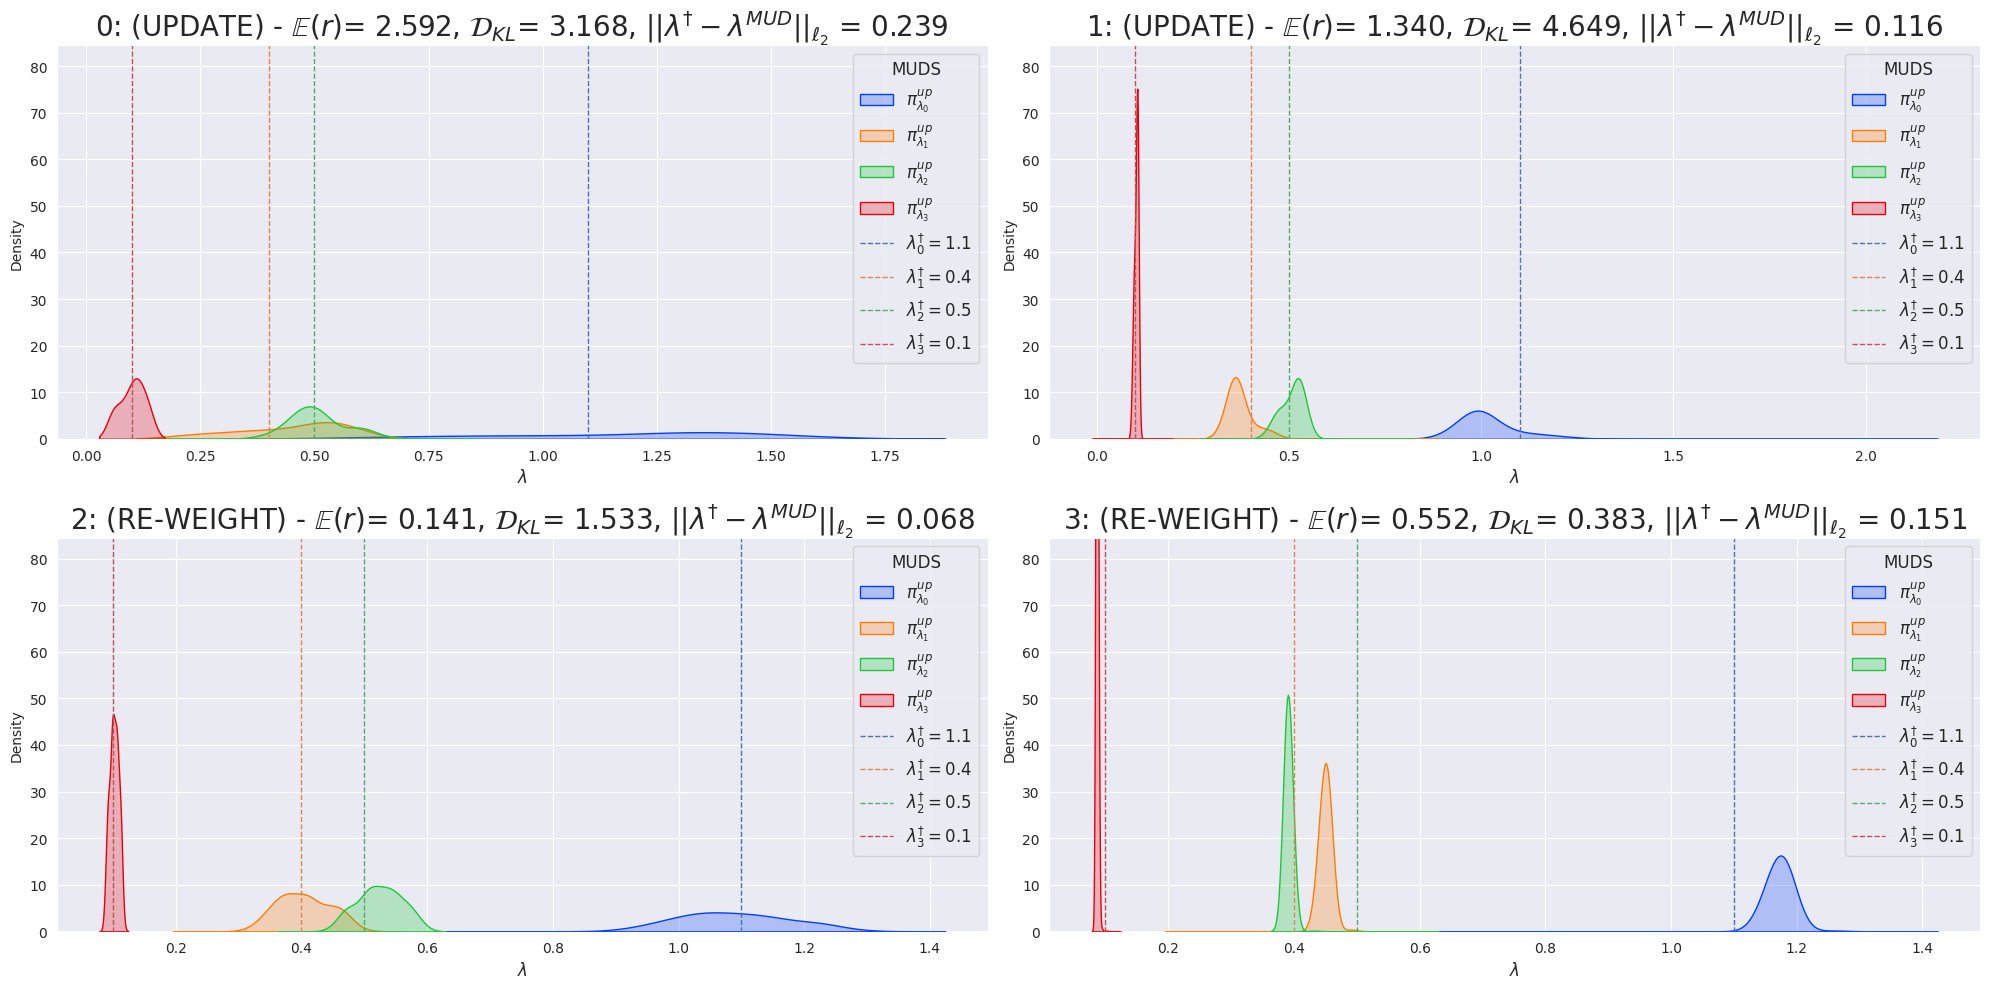

In [72]:
importlib.reload(plt)
plotter = plt.Plotter()

ax = plotter.plot_parameters(lvm, param_idxs=None, nrows=2,ncols=2, plot_initial=False, plot_legend=True)

(-0.1, 0.1)

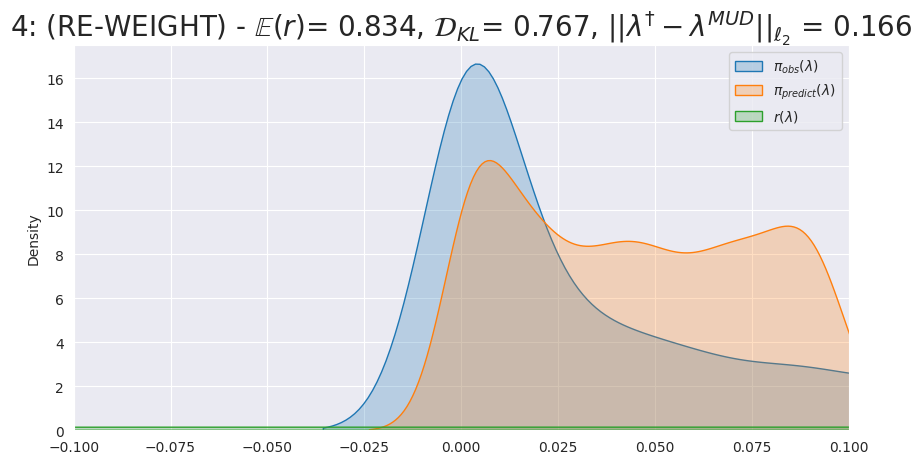

In [9]:
importlib.reload(plt)
plotter = plt.Plotter()

axs = plotter.plot_ratios(lvm, iterations=[4])
axs[0].set_xlim([-0.1,0.1])

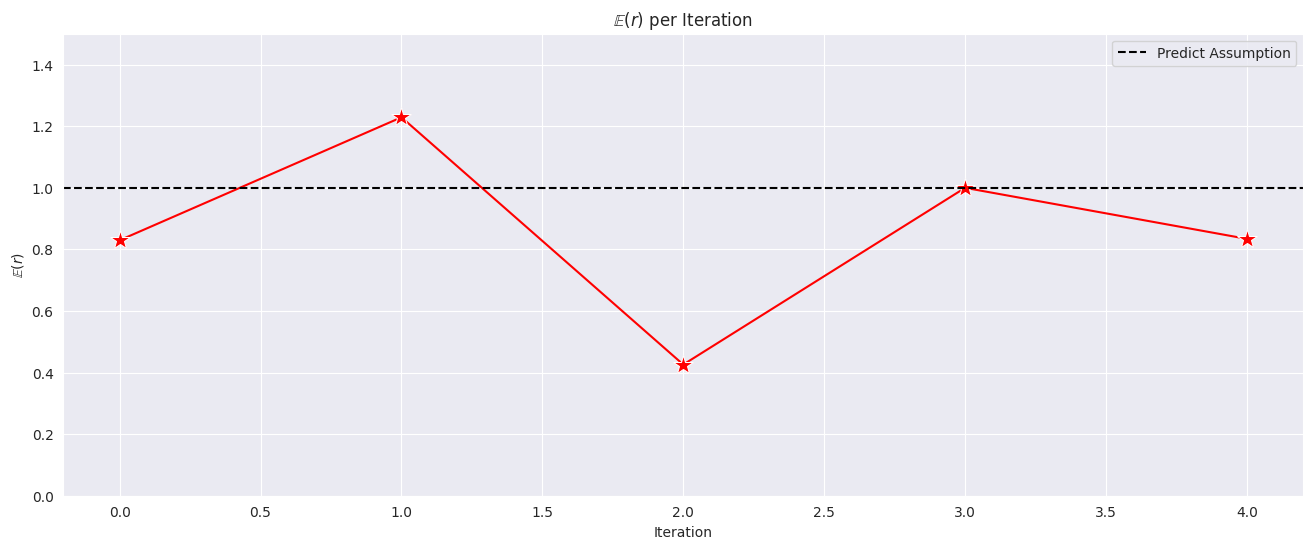

In [10]:
importlib.reload(plt)
plotter = plt.Plotter()

ax = plotter.plot_expected_ratios(lvm)

### Other plots

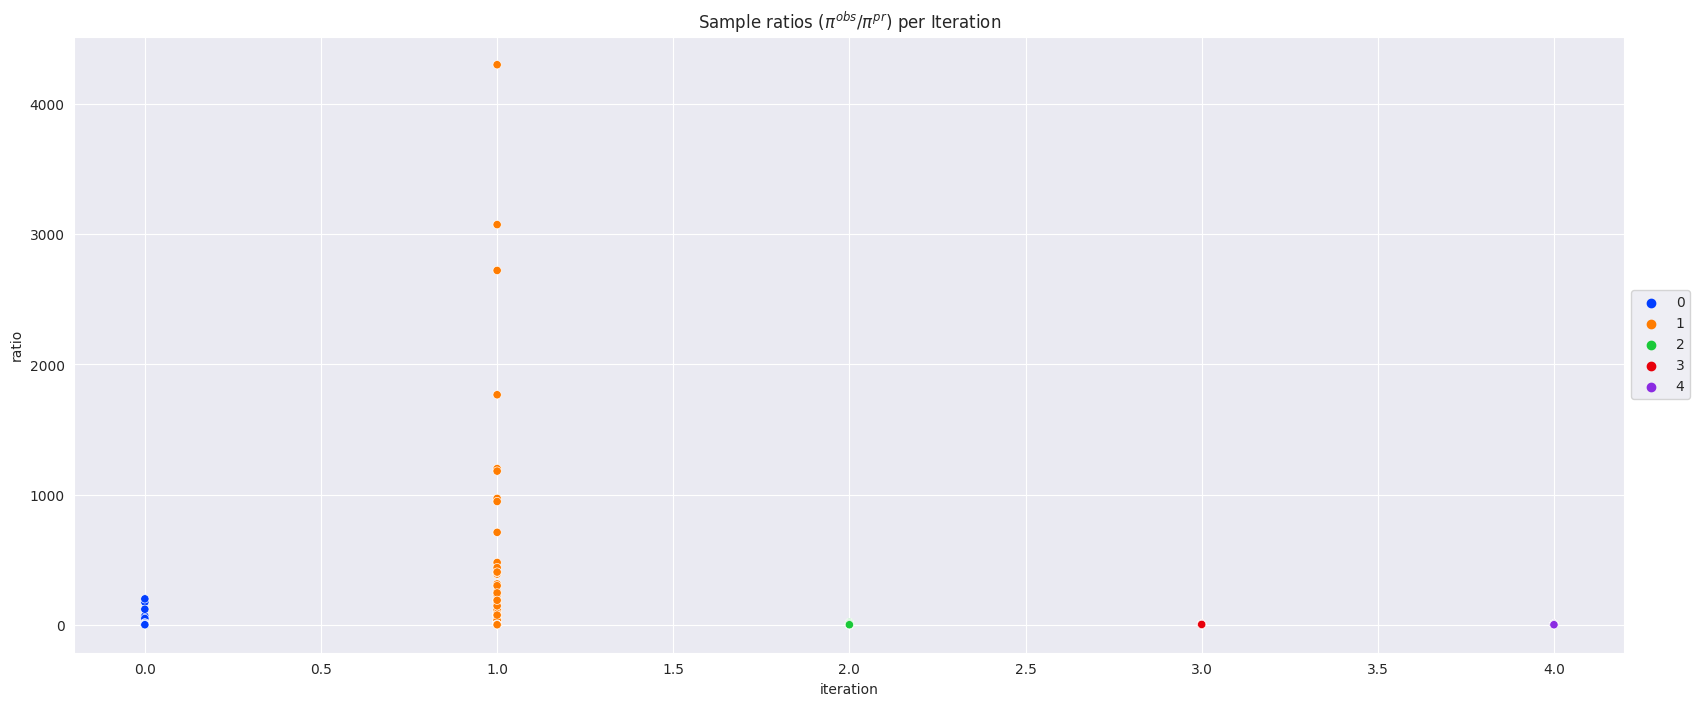

In [33]:
importlib.reload(plt)
plotter = plt.Plotter()

ax = plotter.plot_ratio_scatter(lvm)

<Figure size 1200x1000 with 0 Axes>

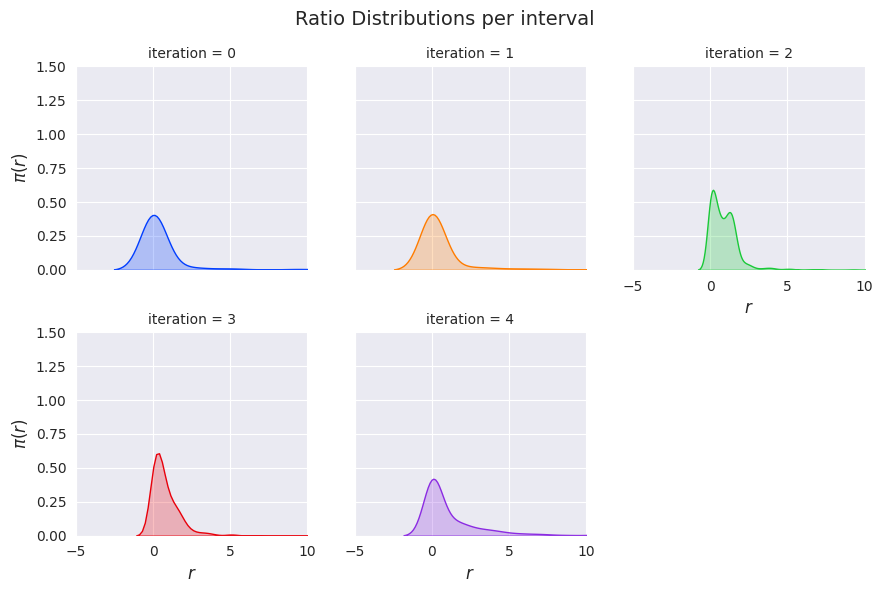

In [17]:
importlib.reload(plt)
plotter = plt.Plotter()
ax = plotter.plot_ratio_dist(lvm, ncols=3)

## Param Shift

In [37]:
num_samples = 1000
lv1_param_mins = [0, 0, 0, 0]
lv1_true_param = lv_p1
x0 = np.array([2, 4])
param_shifts = {50: lv_p2}

search_params = {
    "nc": 1,
    "method": "all",
    "best": "closest",
    "reweight": True,
    "resample": True,
    "min_weight_thresh": 1e-20,
}

SDP.disable_log()
SDP.enable_log('lvm_shift.log') # 'test.log'

lvm_shift = SDP.SequentialDensityProblem(
    run_lv,
    x0,
    lv1_true_param,
    measurement_noise=0.3,
    solve_ts=0.1,
    sample_ts=1,
    diff=0.15,
    hot_starts=True,
    param_mins=lv1_param_mins,
    param_shifts=param_shifts,
    search_params=search_params,
)


lvm_shift.seq_solve(
    list(np.arange(5, 100, 5)), num_samples=num_samples, init_seed=lv1_initial_seed
)

In [42]:
lvm_shift.get_full_df('results')

,iteration,lam_MUD_0,lam_MUD_1,lam_MUD_2,lam_MUD_3,l2_err,e_r,kl,mean_e_r,e_r_std,min_e_r,max_e_r,predict_delta,within_thresh,closest,max_kl,min_kl,action
0,0.0,1.020073,0.415474,0.535008,0.092536,0.088933,1.025684e+00,0.879448,1.025684e+00,NaN,1.025684e+00,1.025684e+00,0.025684,True,True,True,True,UPDATE
0,1.0,1.144041,0.426524,0.568299,0.103627,0.085563,1.060664e+00,1.004057,1.060664e+00,NaN,1.060664e+00,1.060664e+00,0.060664,True,True,True,True,UPDATE
0,2.0,1.041359,0.448388,0.573360,0.107992,0.105951,7.361271e-01,0.690713,7.361271e-01,NaN,7.361271e-01,7.361271e-01,0.263873,True,True,True,True,RE-WEIGHT
0,3.0,1.045578,0.381962,0.573023,0.103311,0.092900,9.217223e-01,1.258334,9.217223e-01,NaN,9.217223e-01,9.217223e-01,0.078278,True,True,True,True,RE-WEIGHT
0,4.0,1.118205,0.423153,0.457905,0.089288,0.052481,8.982552e-01,1.338004,8.982552e-01,NaN,8.982552e-01,8.982552e-01,0.101745,True,True,True,True,UPDATE
0,5.0,1.100234,0.402581,0.439593,0.087543,0.061733,9.888614e-01,1.089782,9.888614e-01,NaN,9.888614e-01,9.888614e-01,0.011139,True,True,True,True,RE-WEIGHT
0,6.0,1.142777,0.412111,0.455019,0.093134,0.063616,9.438657e-01,0.471831,9.438657e-01,NaN,9.438657e-01,9.438657e-01,0.056134,True,True,True,True,RE-WEIGHT
0,7.0,1.188606,0.454313,0.495869,0.098151,0.104026,1.025857e+00,0.212427,1.025857e+00,NaN,1.025857e+00,1.025857e+00,0.025857,True,True,True,True,RE-WEIGHT
0,8.0,1.044713,0.377847,0.492449,0.093684,0.060368,9.817774e-01,0.686800,9.817774e-01,NaN,9.817774e-01,9.817774e-01,0.018223,True,True,True,True,RE-WEIGHT
0,9.0,1.071921,0.385399,0.515438,0.104118,0.035453,9.950495e-01,0.229483,9.950495e-01,NaN,9.950495e-01,9.950495e-01,0.004951,True,True,True,True,RE-WEIGHT


(-1.0, 10.0)

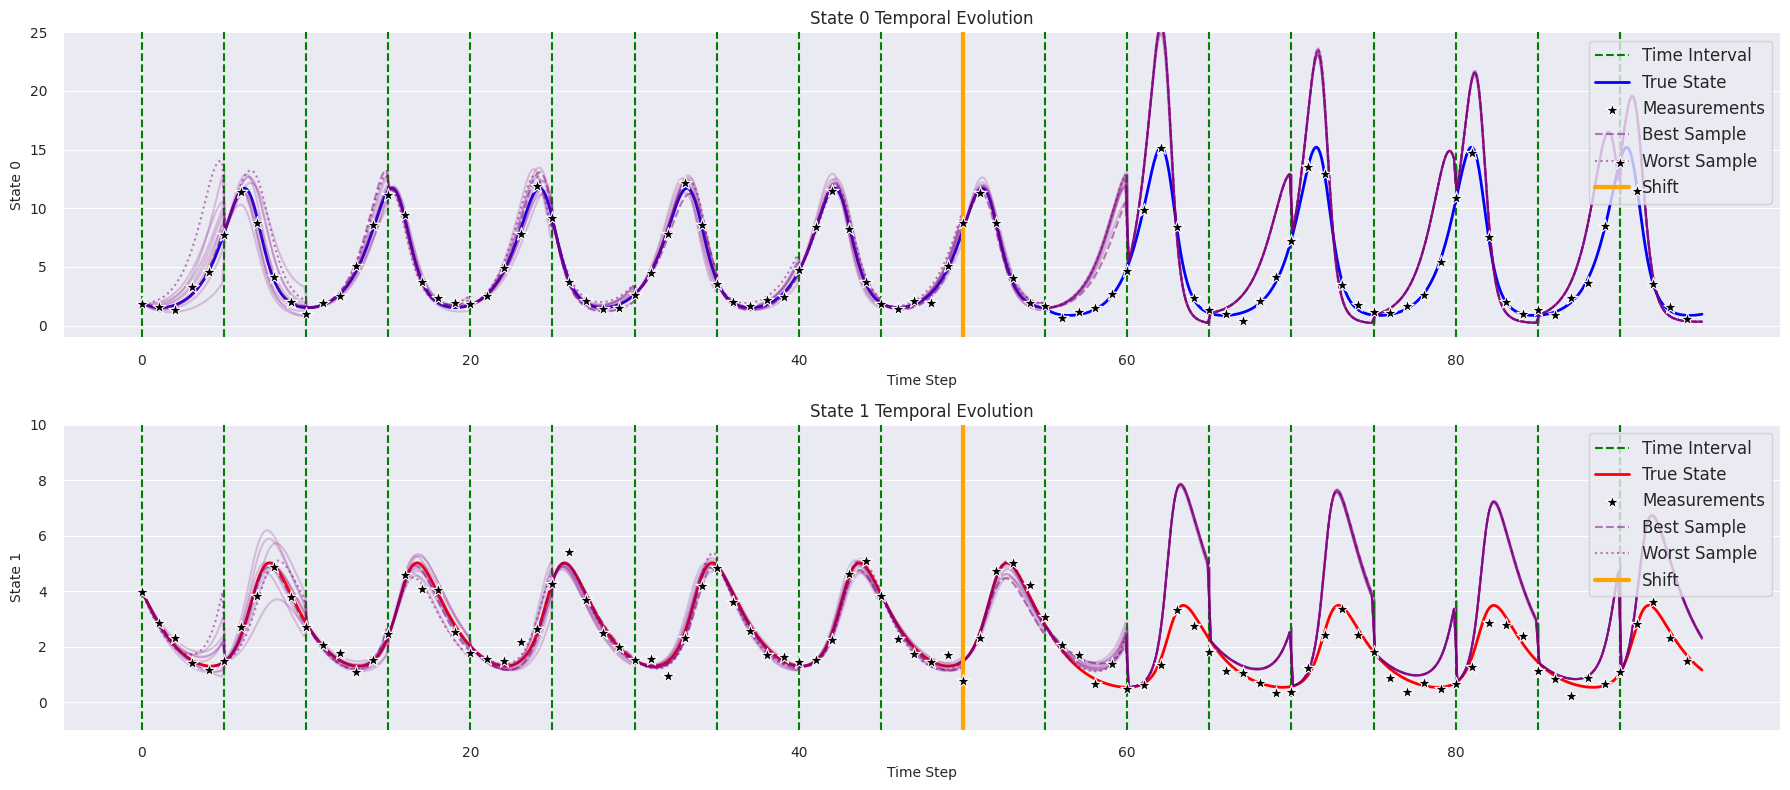

In [36]:
axs = plotter.plot_state_data(lvm_shift, window_type='line')
axs[0].set_ylim([-1, 25])
axs[1].set_ylim([-1, 10])

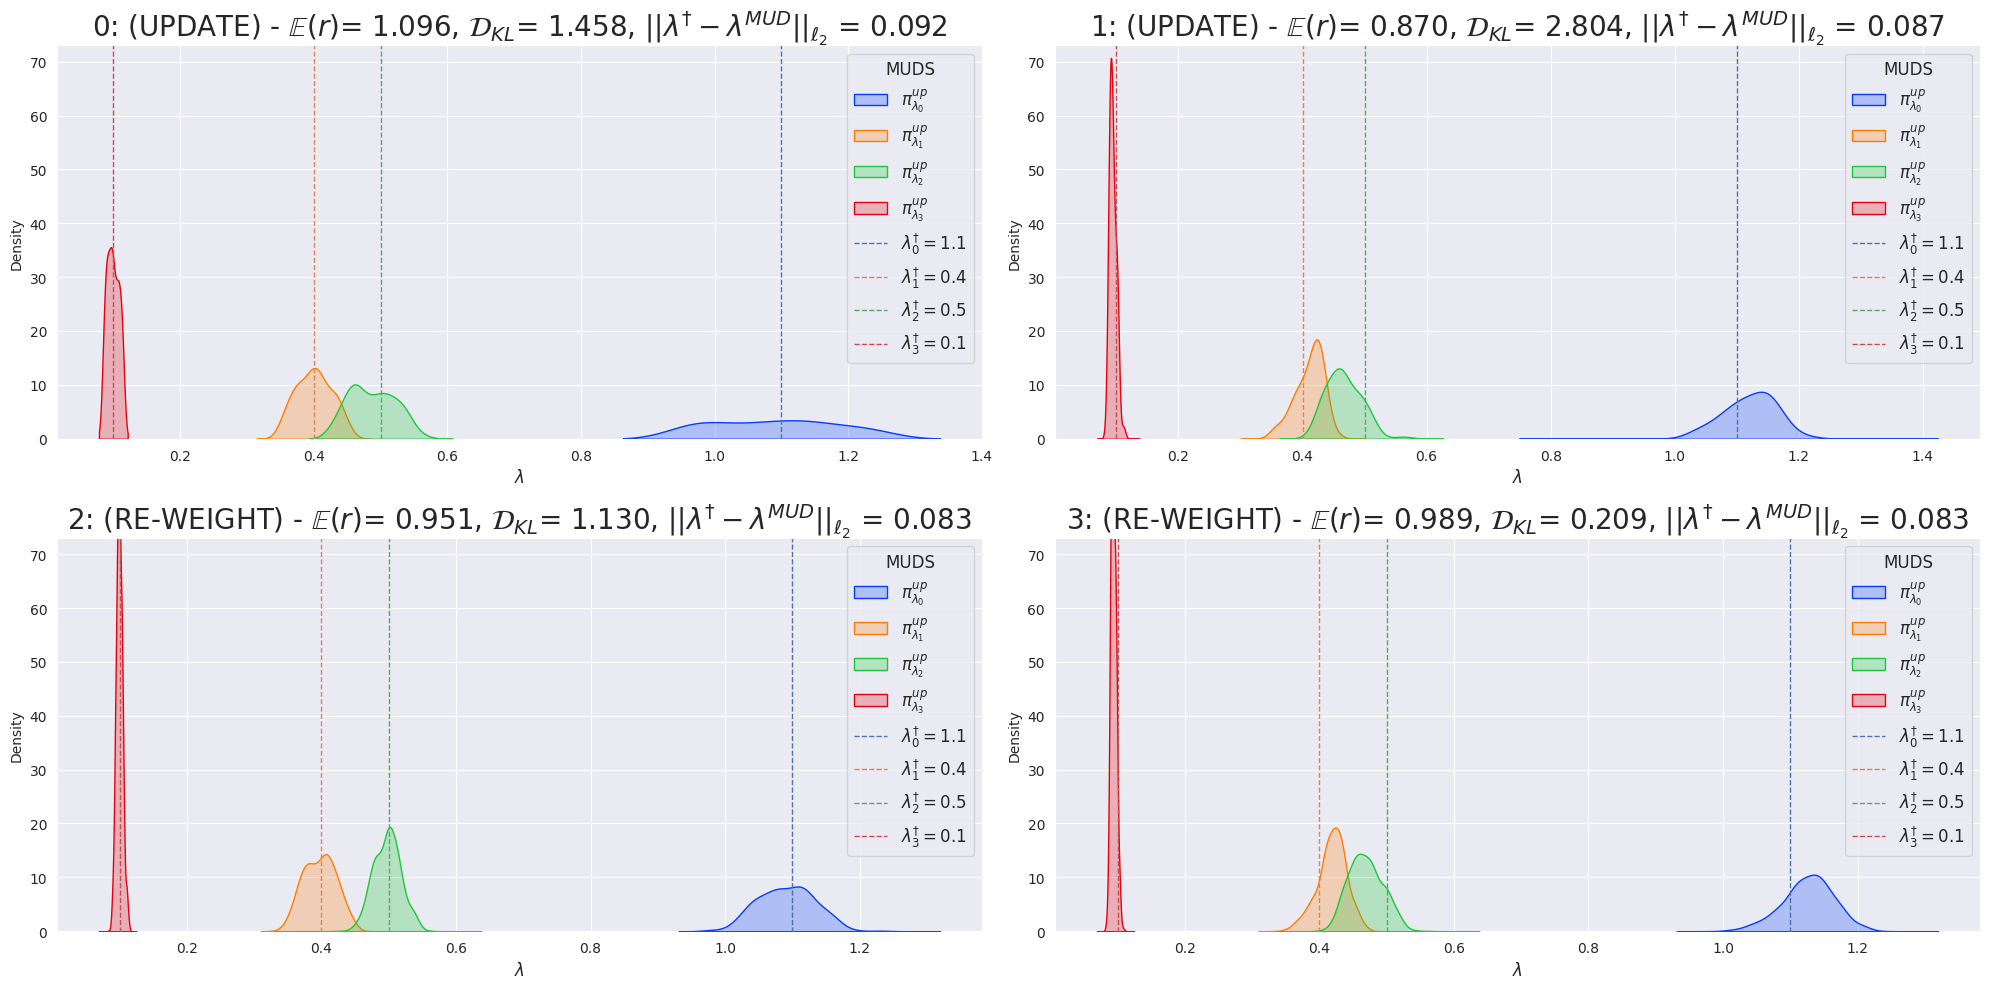

In [24]:
importlib.reload(plt)
plotter = plt.Plotter()

ax = plotter.plot_parameters(lvm, param_idxs=None, nrows=2, ncols=2, plot_initial=False, plot_legend=True)

## Param Shift - Detecting

Ways to detect:

1. exp_r shift -> Shift in value of E_r
2. KL divergence large 

In [83]:
num_samples = 1000
lv1_param_mins = [0, 0, 0, 0]
lv1_true_param = lv_p1
x0 = np.array([2, 4])
param_shifts = {50: lv_p2}

search_params = {
    "nc": 1,
    "method": "all",
    "best": "closest",
    "reweight": True,
    "resample": True,
    "min_weight_thresh": 1e-20,
    "mean_exp_delta_thresh": 0.5,
    "kl_thresh_Factor": 3.0,
    "exp_thresh": 0.5,
}

importlib.reload(SDP)
SDP.disable_log()
SDP.enable_log('lvm_shift.log') # 'test.log'

lvm_shift = SDP.SequentialDensityProblem(
    run_lv,
    x0,
    lv1_true_param,
    measurement_noise=0.1,
    solve_ts=0.1,
    sample_ts=1,
    diff=0.5,
    hot_starts=True,
    param_mins=lv1_param_mins,
    param_shifts=param_shifts,
    search_params=search_params,
)


lvm_shift.seq_solve(
    list(np.arange(5, 120, 5)), num_samples=num_samples, init_seed=lv1_initial_seed
)

on 52: /opt/conda/envs/pyDCI/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
         warnings.warn(warning_msg, ODEintWarning)


on 631: /opt/conda/envs/pyDCI/lib/python3.11/site-packages/scipy/integrate/_odepack_py.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
          warnings.warn(warning_msg, ODEintWarning)


In [84]:
lvm_shift.get_full_df('results')

,iteration,lam_MUD_0,lam_MUD_1,lam_MUD_2,lam_MUD_3,l2_err,e_r,kl,mean_e_r,e_r_std,min_e_r,max_e_r,predict_delta,within_thresh,closest,max_kl,min_kl,action
0,0.0,1.384078,0.485643,0.387418,0.083952,0.317753,9.718998e-01,2.830717,9.718998e-01,NaN,9.718998e-01,9.718998e-01,0.028100,True,True,True,True,UPDATE
0,1.0,1.187574,0.425297,0.513922,0.100043,0.092211,1.076408e+00,3.243049,1.076408e+00,NaN,1.076408e+00,1.076408e+00,0.076408,True,True,True,True,UPDATE
0,2.0,1.064808,0.348357,0.427385,0.089904,0.096335,1.061296e+00,2.847409,1.061296e+00,NaN,1.061296e+00,1.061296e+00,0.061296,True,True,True,True,UPDATE
0,3.0,1.220801,0.453040,0.411505,0.086288,0.159454,1.071156e+00,2.129300,1.071156e+00,NaN,1.071156e+00,1.071156e+00,0.071156,True,True,True,True,UPDATE
0,4.0,1.111141,0.411170,0.499027,0.102790,0.016051,1.083718e+00,1.686706,1.083718e+00,NaN,1.083718e+00,1.083718e+00,0.083718,True,True,True,True,UPDATE
0,5.0,1.074170,0.396158,0.500601,0.098747,0.026152,1.021412e+00,0.695146,1.021412e+00,NaN,1.021412e+00,1.021412e+00,0.021412,True,True,True,True,UPDATE
0,6.0,1.090121,0.393317,0.509764,0.103155,0.015733,9.712326e-01,1.644778,9.712326e-01,NaN,9.712326e-01,9.712326e-01,0.028767,True,True,True,True,UPDATE
0,7.0,1.089473,0.400166,0.511715,0.104908,0.016497,1.025275e+00,0.137782,1.025275e+00,NaN,1.025275e+00,1.025275e+00,0.025275,True,True,True,True,RE-WEIGHT
0,8.0,1.132863,0.425218,0.504770,0.099670,0.041699,1.027293e+00,0.685251,1.027293e+00,NaN,1.027293e+00,1.027293e+00,0.027293,True,True,True,True,RE-WEIGHT
0,9.0,1.112713,0.405622,0.491149,0.098932,0.016514,1.017741e+00,0.274498,1.017741e+00,NaN,1.017741e+00,1.017741e+00,0.017741,True,True,True,True,RE-WEIGHT


In [85]:
lvm_shift.domain, lvm_shift.true_param, lvm_shift.param_shifts

(array([[0.55, 1.65],
        [0.2 , 0.6 ],
        [0.25, 0.75],
        [0.05, 0.15]]),
 [1.1, 0.4, 0.5, 0.1],
 {50: [1.1, 0.55, 0.5, 0.1]})

(-1.0, 10.0)

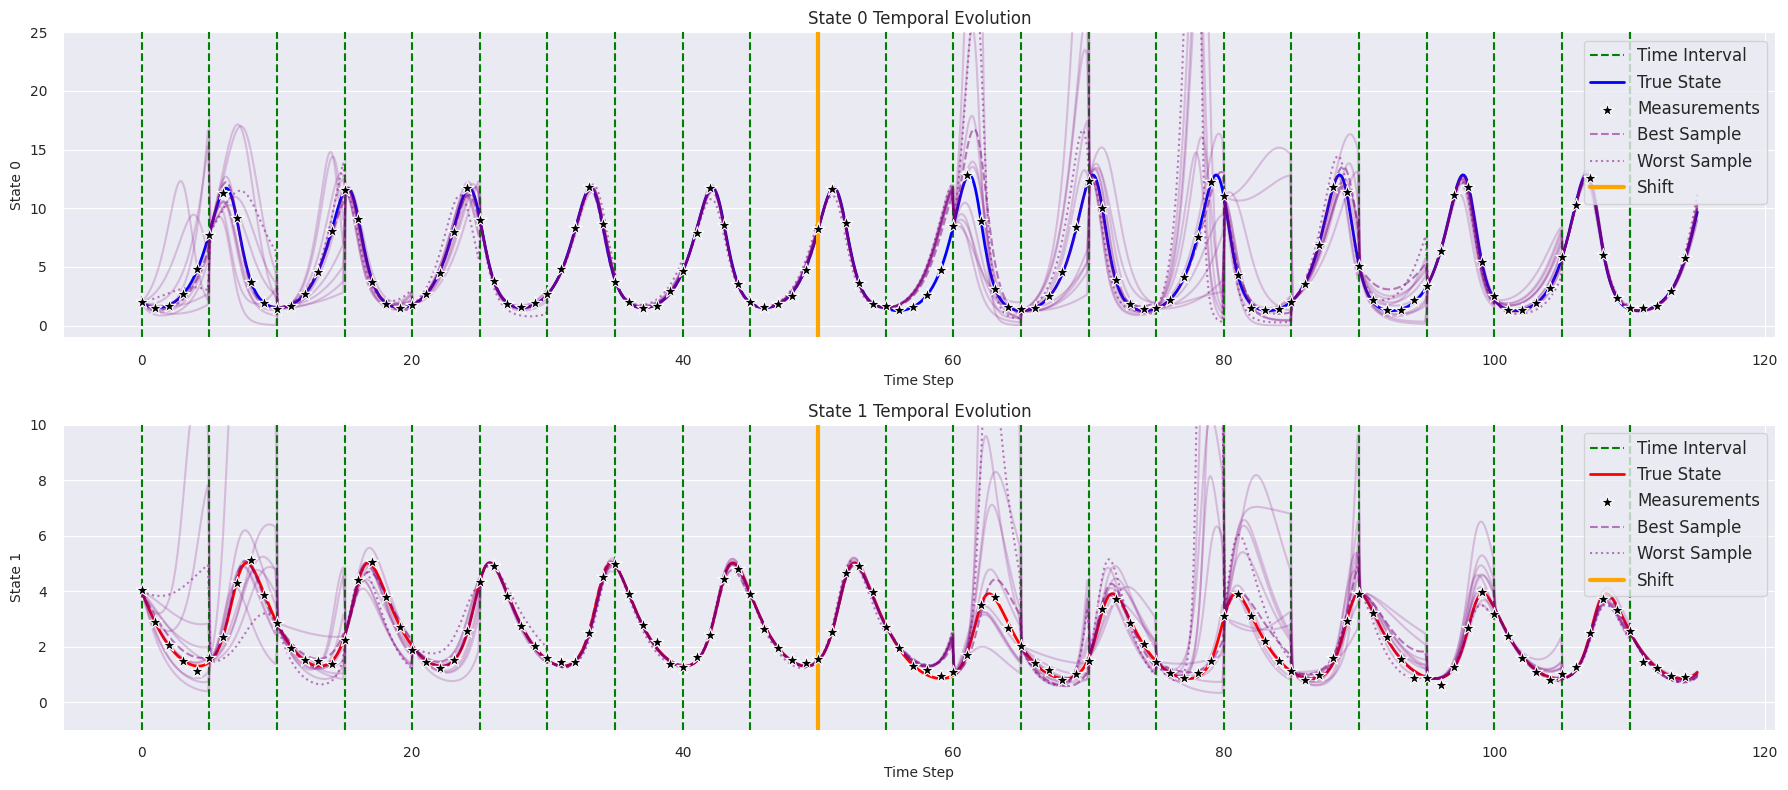

In [86]:
axs = plotter.plot_state_data(lvm_shift, window_type='line')
axs[0].set_ylim([-1, 25])
axs[1].set_ylim([-1, 10])

In [36]:
x0 = lvm_shift._get_df(lvm_shift.dfs['state'][11], 'true_vals', typ='state')[-1]
x0

array([4.94960516, 0.53119671])

In [38]:
num_samples = 1000
lv1_param_mins = [0, 0, 0, 0]
# lv1_true_param = lv_p1
# x0 = np.array([2, 4])
param_shifts = None # {50: lv_p2}

search_params = {
    "nc": 1,
    "method": "all",
    "best": "closest",
    "reweight": True,
    "resample": True,
    "min_weight_thresh": 1e-20,
    "mean_exp_delta_thresh": 0.5,
    "kl_thresh_Factor": 3.0,
    "exp_thresh": 0.5,
}

importlib.reload(SDP)
SDP.disable_log()
SDP.enable_log('lvm_shift.log') # 'test.log'

lvm_shift = SDP.SequentialDensityProblem(
    run_lv,
    x0,
    lv_p2,
    measurement_noise=0.1,
    solve_ts=0.1,
    sample_ts=1,
    diff=0.15,
    hot_starts=True,
    param_mins=lv1_param_mins,
    param_shifts=param_shifts,
    search_params=search_params,
)


lvm_shift.seq_solve(
    list(np.arange(5, 120, 5)), num_samples=num_samples, init_seed=lv1_initial_seed
)

(-1.0, 10.0)

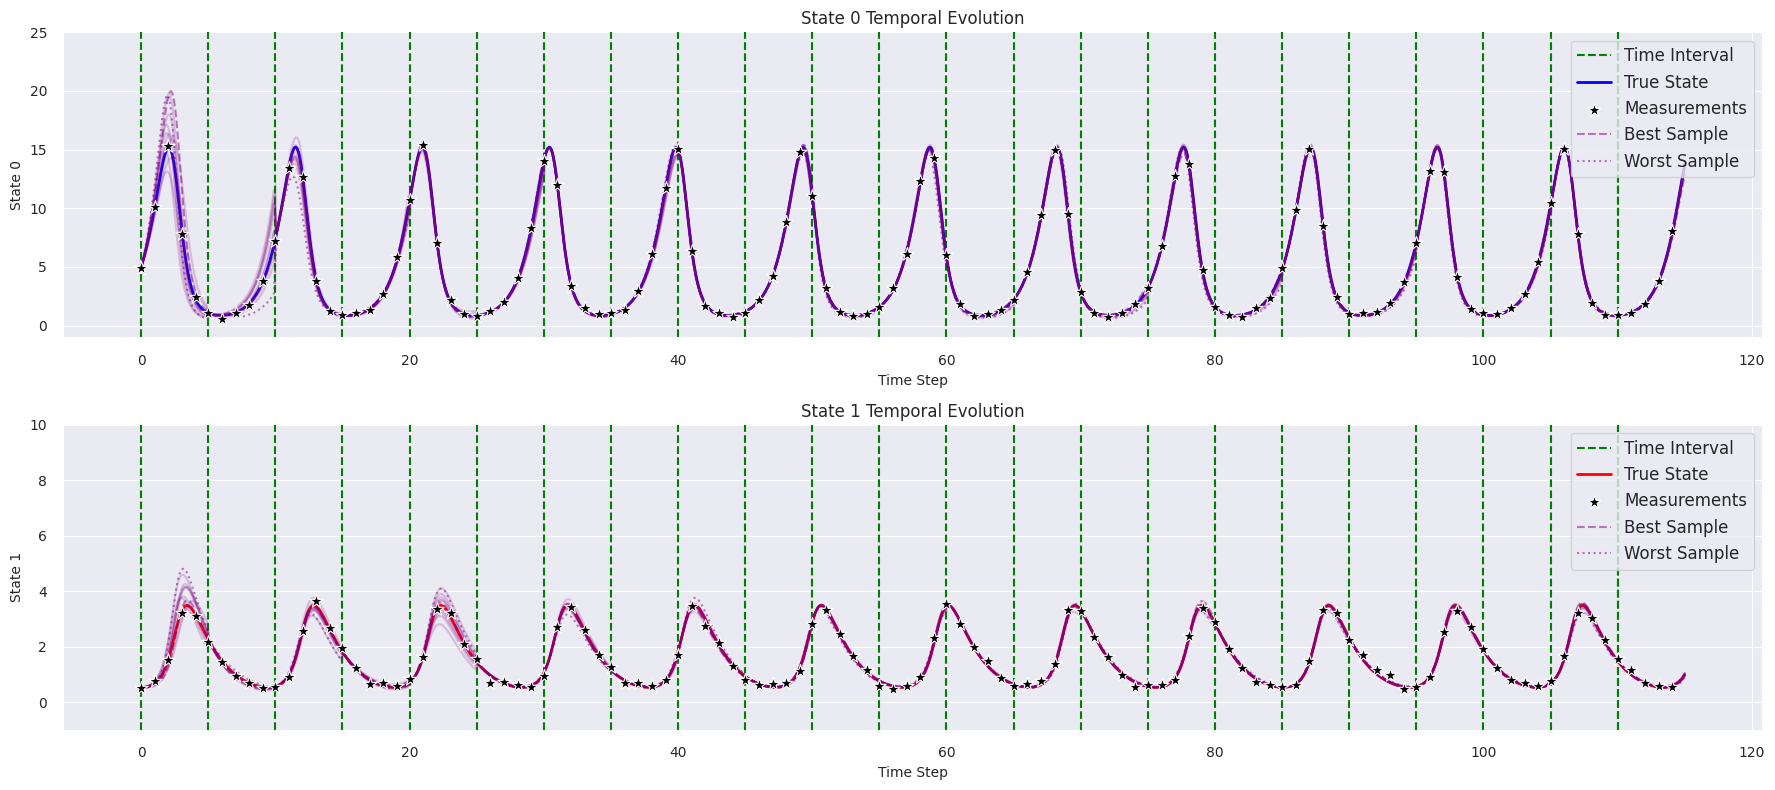

In [39]:
axs = plotter.plot_state_data(lvm_shift, window_type='line')
axs[0].set_ylim([-1, 25])
axs[1].set_ylim([-1, 10])